#### Dataset

In [2]:
# Social_Network_Ads.csv
# Location: https://mitu.co.in/dataset

#### Import the libraries 

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Read the data

In [6]:
df = pd.read_csv('Social_Network_Ads.csv')

In [7]:
df.shape

(400, 5)

In [8]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


#### Separate the input and output data

In [10]:
x = df[['Age','EstimatedSalary']]
y = df['Purchased']

#### Exploratory Data Analysis

In [12]:
import seaborn as sns

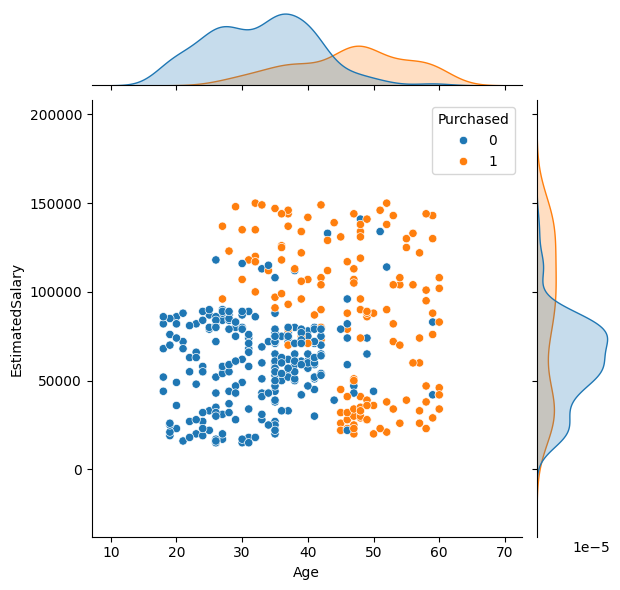

In [13]:
sns.jointplot(x = 'Age', y = 'EstimatedSalary', hue = 'Purchased', data = df)

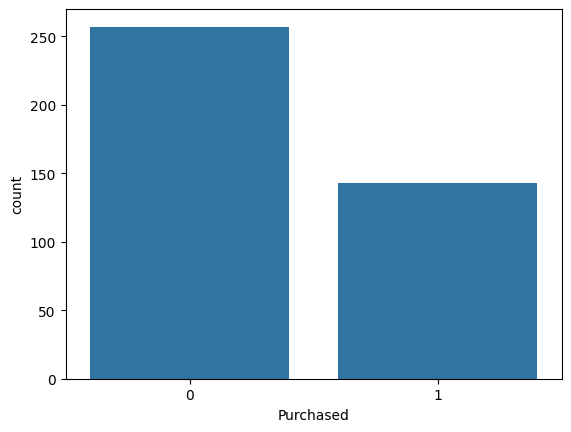

In [14]:
sns.countplot(x = y);

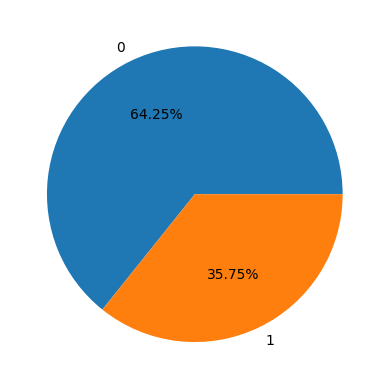

In [17]:
plt.pie(y.value_counts(), labels=y.value_counts().index, autopct='%2.2f%%');

In [18]:
y.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

#### Cross Validation

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [22]:
x_train.shape

(300, 2)

In [23]:
x_test.shape

(100, 2)

In [24]:
x_train

,Age,EstimatedSalary
250,44.0,39000.0
63,32.0,120000.0
312,38.0,50000.0
159,32.0,135000.0
283,52.0,21000.0
...,...,...
323,48.0,30000.0
192,29.0,43000.0
117,36.0,52000.0
47,27.0,54000.0


#### Build the model

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
classifier = DecisionTreeClassifier(random_state=0)

In [29]:
# Train the algorithm
classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [30]:
from sklearn.tree import plot_tree

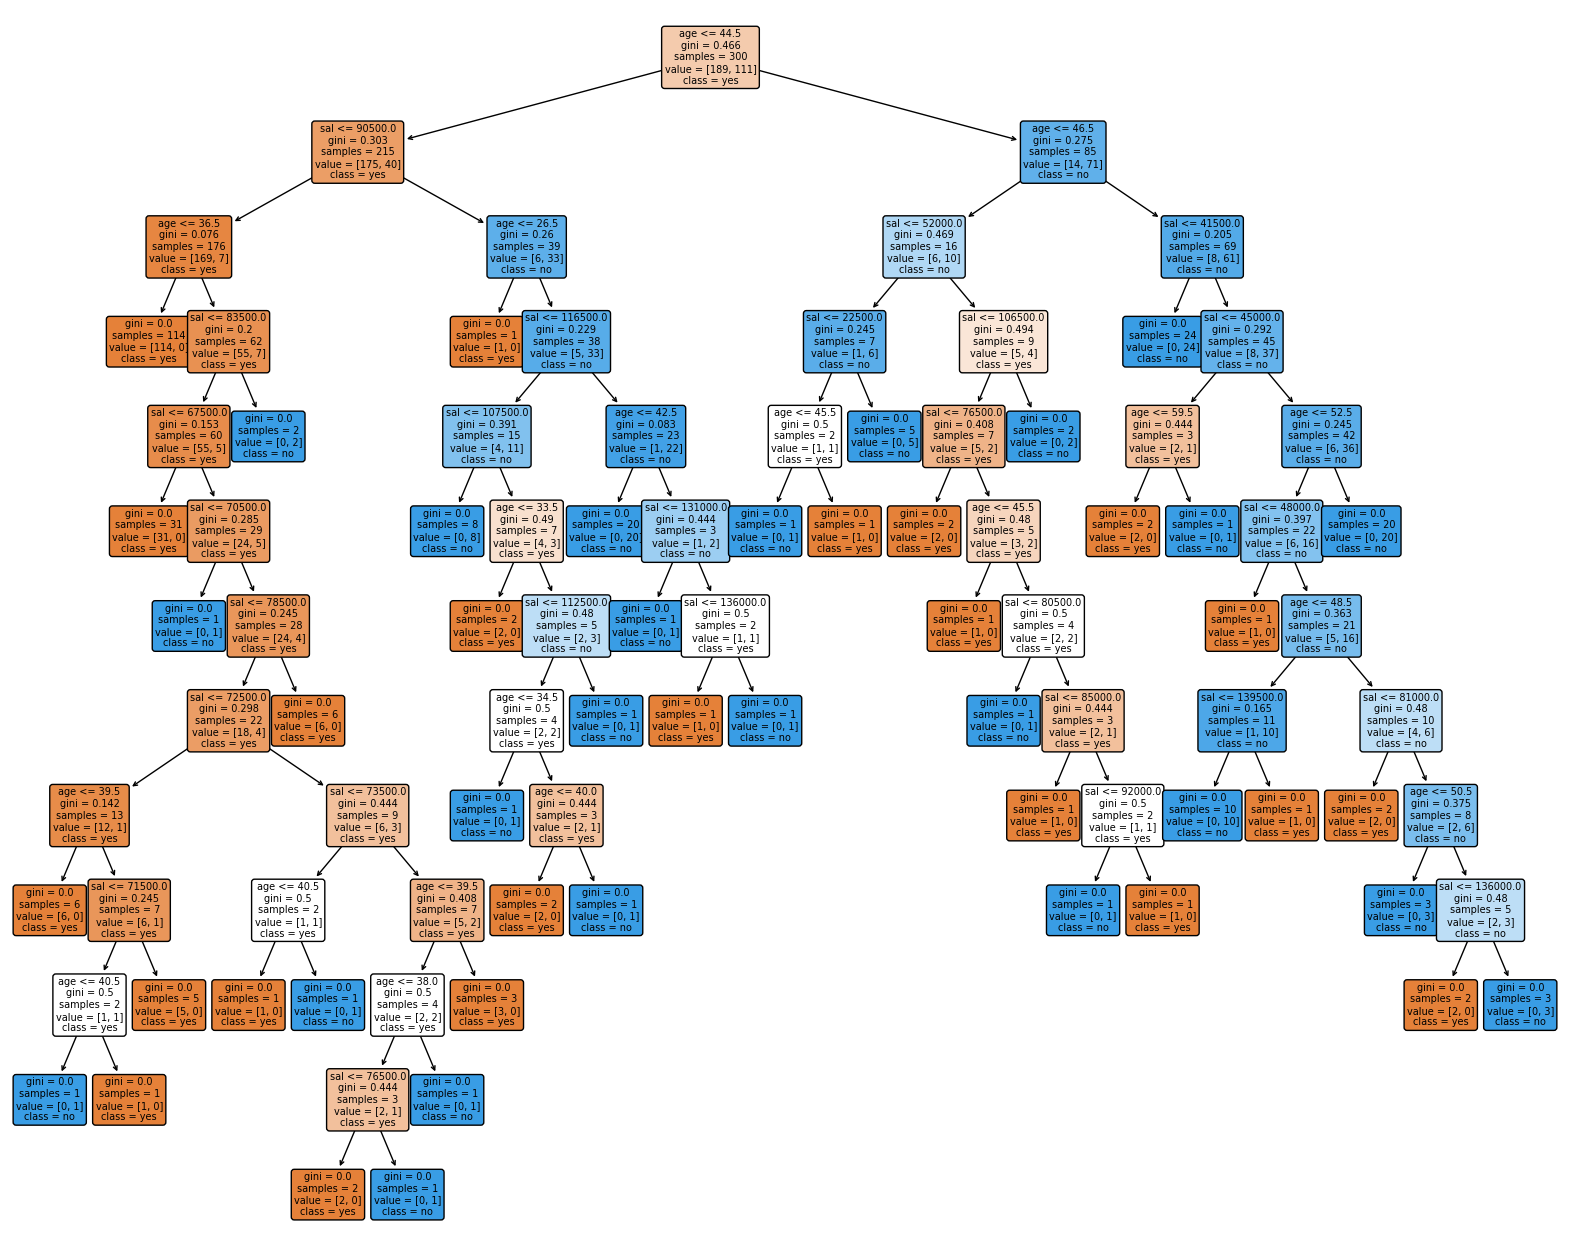

In [31]:
plt.figure(figsize=(20,16))
plot_tree(classifier, fontsize=7, filled=True, rounded=True,
          feature_names=['age','sal'], class_names=['yes','no']);

#### Prediction on test data

In [33]:
y_pred = classifier.predict(x_test)

In [34]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [35]:
y_test.values

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

In [38]:
y_test.value_counts()

Purchased
0    68
1    32
Name: count, dtype: int64

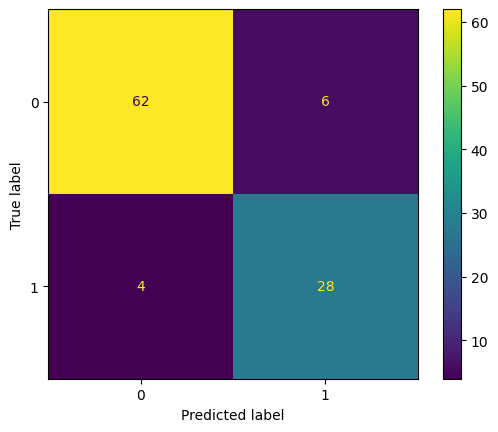

In [37]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [39]:
accuracy_score(y_test, y_pred)

0.9

#### Prediction on new data

In [41]:
new = pd.DataFrame([[23,34000],[57,123000],[45,79300]], columns=x.columns)

In [42]:
new

,Age,EstimatedSalary
0,23,34000
1,57,123000
2,45,79300


In [43]:
classifier.predict(new)

array([0, 1, 0])